In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime




 At first We Load the spotify 30K songs dataset

Things To be done:
* Showing the number of songs per year for the different playlist_genres (line chart)
* Analyzing the evolution during the year of the average length of the songs (line chart)
* Showing the histogram of the lengths of the songs, selecting an optimal binning
* Showing the evolution of the percentages of the different playlist_genres with respect to the total
* Creating a chart to display the percentages of the different subgeneres of rock music in different ranges of years (<1970, 1970-1979, 1980-1989, 1990-1999, 2000-2010, >2010)
* Comparing the distributions of the average track popularity of the different genres using a visualization idiom for statistical analysis
* Creating a chart to show the correlations between popularity, danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
*  visualizing a scatter plot with the average tempo vs average popularity for each artist with more than 5 items, colored by genres and use a different mark (pre-attentive) to make a specific artist of your interest evident.




In [2]:
songs = pd.read_csv("spotify_songs.csv")

# Check row and column numbers

rows = songs.shape[0]
cols = songs.shape[1]
print("Rows   : " + str(rows))
print("Columns: " + str(cols))


#print(songs.isnull().sum())
songs = songs.dropna()

# Adding 'release_year' column
songs['year'] = pd.DatetimeIndex(songs['track_album_release_date']).year.astype(int)

songs['duration'] = songs['duration_ms']/1000
songs.sort_values(by='year', ascending=True)
songs.head()

Rows   : 32833
Columns: 23


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [3]:
#sort artists
art = songs.groupby(['track_artist']).agg(
    items=('track_id', 'count'),
    popularity=('track_popularity', 'mean')
).sort_values(by='items', ascending=False)


artsel=art[art["items"]>10]
print(artsel)

                  items  popularity
track_artist                       
Martin Garrix       161   47.204969
Queen               136   43.000000
The Chainsmokers    123   57.699187
David Guetta        110   53.436364
Don Omar            102   41.950980
...                 ...         ...
Duran Duran          11   58.090909
Macross 82-99        11   40.272727
Wolfgang Lohr        11   39.454545
MAX                  11   66.272727
Nio Garcia           11   68.363636

[536 rows x 2 columns]


In [4]:
#aggregate data
songagg = songs.groupby(['playlist_genre','year']).agg(
    items=('track_id', 'count'),
    popularity=('track_popularity', 'mean')
).reset_index()

songagg.tail()

,playlist_genre,year,items,popularity
297,rock,2016,77,38.155844
298,rock,2017,116,37.112069
299,rock,2018,129,40.968992
300,rock,2019,577,36.178510
301,rock,2020,48,39.458333


In [5]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [6]:
print(songs.describe())

# Correlation matrix
corr_matrix = songs

       track_popularity  danceability        energy           key  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603      5.373949   
std           24.980476      0.145092      0.180916      3.611572   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32828.000000  32828.000000  32828.000000  32828.000000   
mean      -6.719529      0.565737      0.107053      0.175352   
std        2.988641      0.495667      0.101307      0.219644   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171250      0.000000      0.041000      

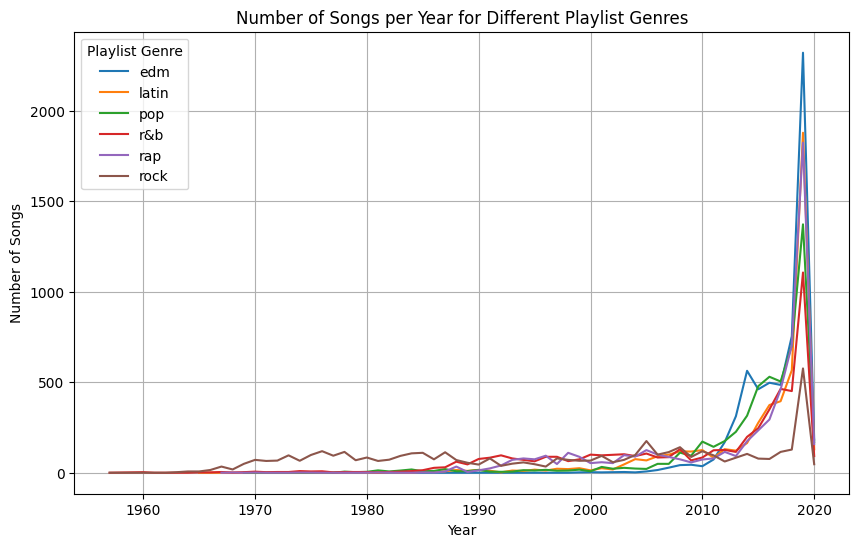

In [7]:

# Grouping data and calculating song counts
genre_year_counts = songs.groupby(['year', 'playlist_genre']).size().reset_index(name='count')

# Creating separate line plots for each genre
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each genre and plot
for genre, data in genre_year_counts.groupby('playlist_genre'):
    ax.plot(data['year'], data['count'], label=genre)

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Songs')
ax.set_title('Number of Songs per Year for Different Playlist Genres')

# Adding legend
ax.legend(title='Playlist Genre')

# Show grid
ax.grid(True)

# Show the plot
plt.show()


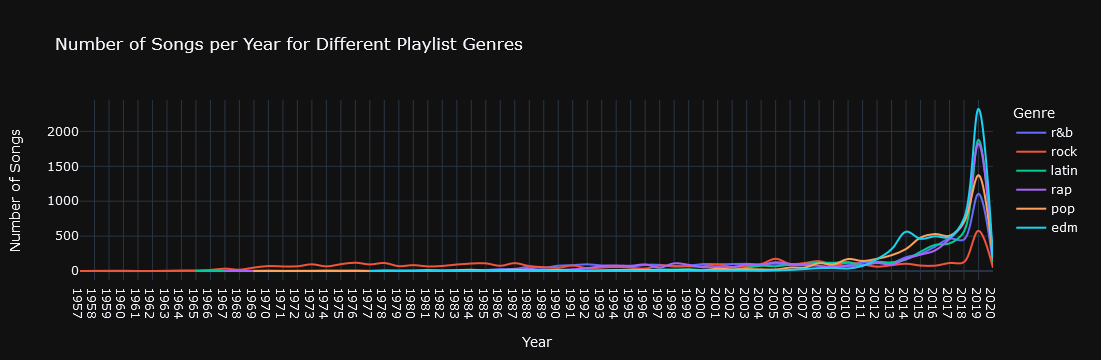

In [9]:

# Grouping data and calculating song counts
genre_year_counts = songs.groupby(['year', 'playlist_genre']).size().reset_index(name='count')

# Creating the line plot
fig = px.line(genre_year_counts, 
              x='year', 
              y='count', 
              color='playlist_genre',
              title='Number of Songs per Year for Different Playlist Genres',
              labels={'count': 'Number of Songs', 'year': 'Year', 'playlist_genre': 'Playlist Genre'},
              template='plotly_dark',  
              line_shape='spline',     
              render_mode='svg'         
             )

# Customizing layout
fig.update_layout(
    legend=dict(
        title='Genre',             
        traceorder='normal'        
    ),
    xaxis=dict(
        dtick=1,                   
        tickmode='linear',         
        showgrid=True              
    ),
    yaxis=dict(
        showgrid=True              
    )
)

# Showing the plot
fig.show()


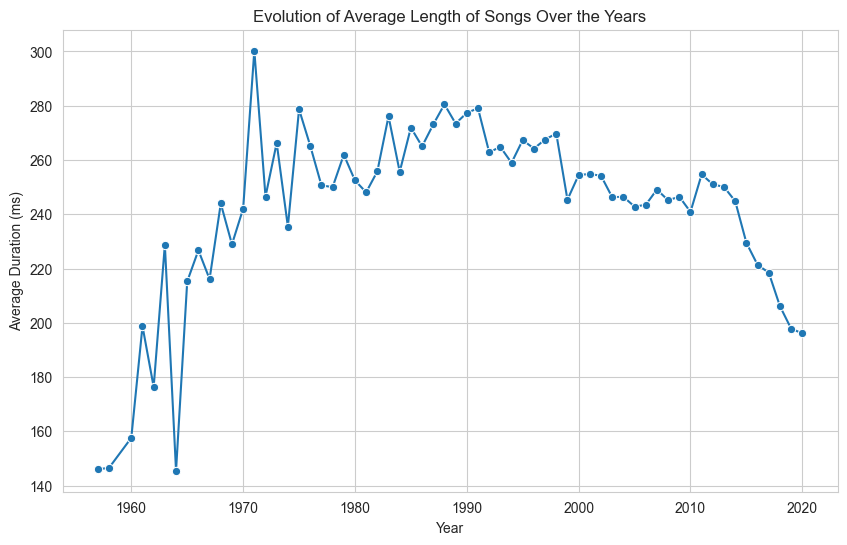

In [10]:


# Grouping data and calculating average duration per year
avg_duration_year = songs.groupby('year')['duration'].mean().reset_index()

# Setting the style
sns.set_style("whitegrid")

# Creating the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_duration_year, x='year', y='duration', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Duration (ms)')
plt.title('Evolution of Average Length of Songs Over the Years')

plt.show()


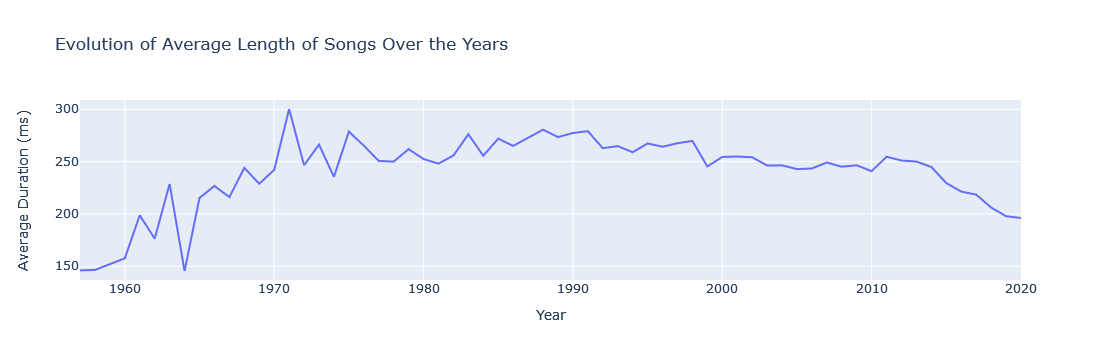

In [7]:
#evolution during the year of the average length of the songs
avg_duration_year = songs.groupby('year')['duration'].mean().reset_index()

fig = px.line(avg_duration_year, x='year', y='duration',
              title='Evolution of Average Length of Songs Over the Years',
              labels={'duration': 'Average Duration (ms)', 'year': 'Year'})
fig.show()

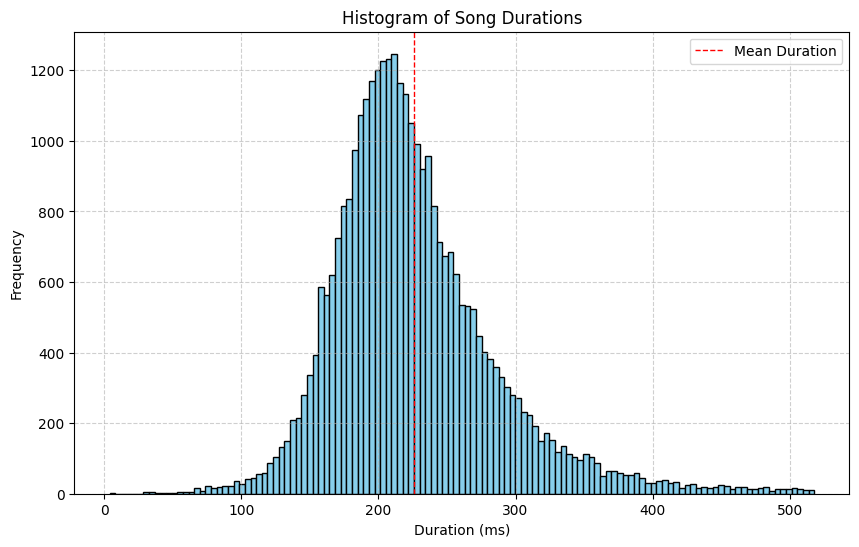

In [8]:

# Calculate the interquartile range (IQR)
q1 = np.percentile(songs['duration'], 25)
q3 = np.percentile(songs['duration'], 75)
iqr = q3 - q1

# Calculate the number of bins using Freedman-Diaconis rule
data_range = songs['duration'].max() - songs['duration'].min()
num_bins = int(data_range / (2 * iqr * len(songs['duration']) ** (-1/3)))

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.hist(songs['duration'], bins=num_bins, color='skyblue', edgecolor='black')  # Add color to bars and black borders
plt.axvline(songs['duration'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Duration')  # Add a dashed line for mean duration
plt.title('Histogram of Song Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines with transparency
plt.legend()  # Add legend to the plot
plt.show()


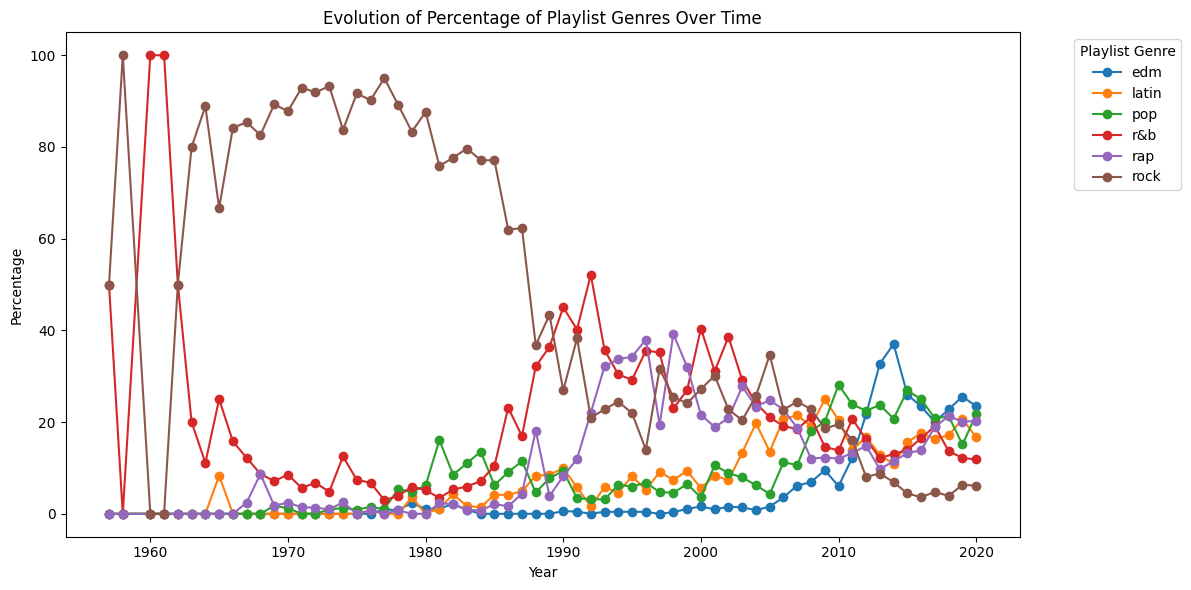

In [9]:
#evolution of the percentages of the different playlist_genreswith respect to the total
total_songs_per_year = songs.groupby('year').size()

# Calculate the percentage of each genre per year
genre_percentage = songs.groupby(['year', 'playlist_genre']).size().unstack(fill_value=0)
genre_percentage = genre_percentage.div(genre_percentage.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))

for genre in genre_percentage.columns:
    plt.plot(genre_percentage.index, genre_percentage[genre], marker='o', label=genre)

plt.title('Evolution of Percentage of Playlist Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

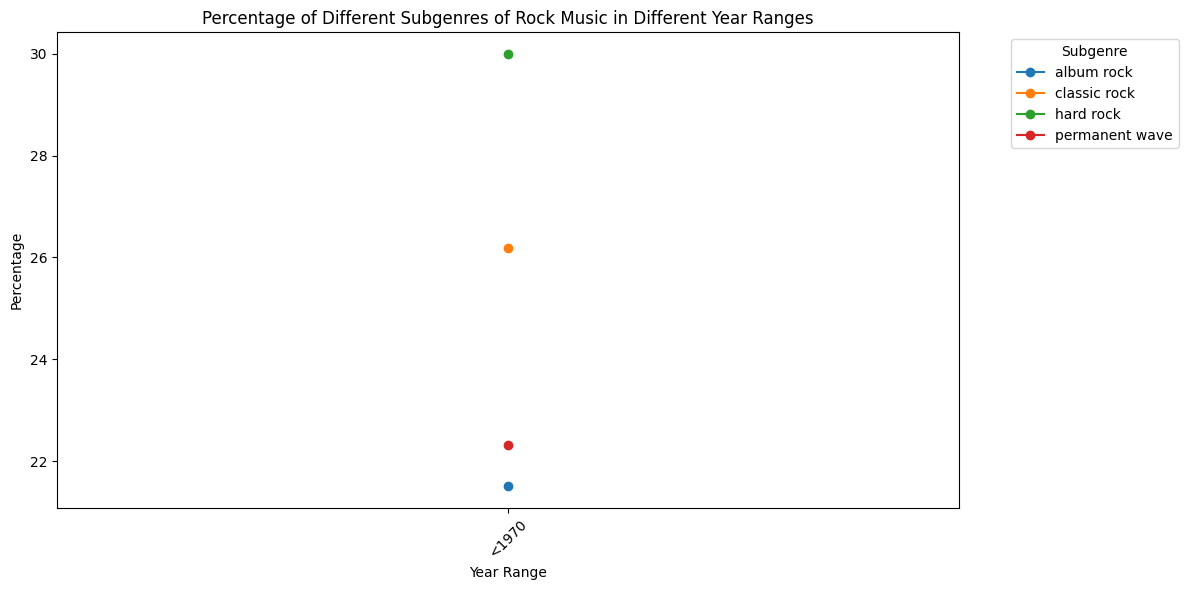

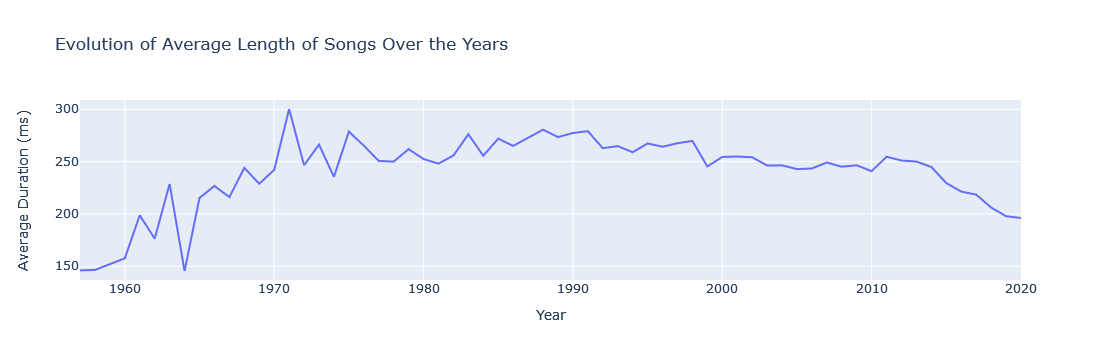

In [10]:
# display the percentages of the different subgeneresof rock music in different ranges of years (<1970, 1970-1979, 1980-1989, 1990-1999, 2000-2010, >2010)

# Define the ranges of years
year_ranges = {
    "<1970": (None, 1970),
    "1970-1979": (1970, 1980),
    "1980-1989": (1980, 1990),
    "1990-1999": (1990, 2000),
    "2000-2010": (2000, 2010),
    ">2010": (2010, None)
}


def categorize_year(year):
    for label, (start, end) in year_ranges.items():
        if (start is None or year < start) or (end is None or year >= end):
            return label

songs['year_range'] = songs['year'].apply(categorize_year)

# Filter rock music
rock_songs = songs[songs['playlist_genre'] == 'rock']

# Calculate the percentage of each subgenre within each year range
subgenre_counts = rock_songs.groupby(['year_range', 'playlist_subgenre']).size().unstack(fill_value=0)
subgenre_percentage = subgenre_counts.div(subgenre_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))

for subgenre in subgenre_percentage.columns:
    plt.plot(subgenre_percentage.index, subgenre_percentage[subgenre], marker='o', label=subgenre)

plt.title('Percentage of Different Subgenres of Rock Music in Different Year Ranges')
plt.xlabel('Year Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Subgenre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

fig.show()

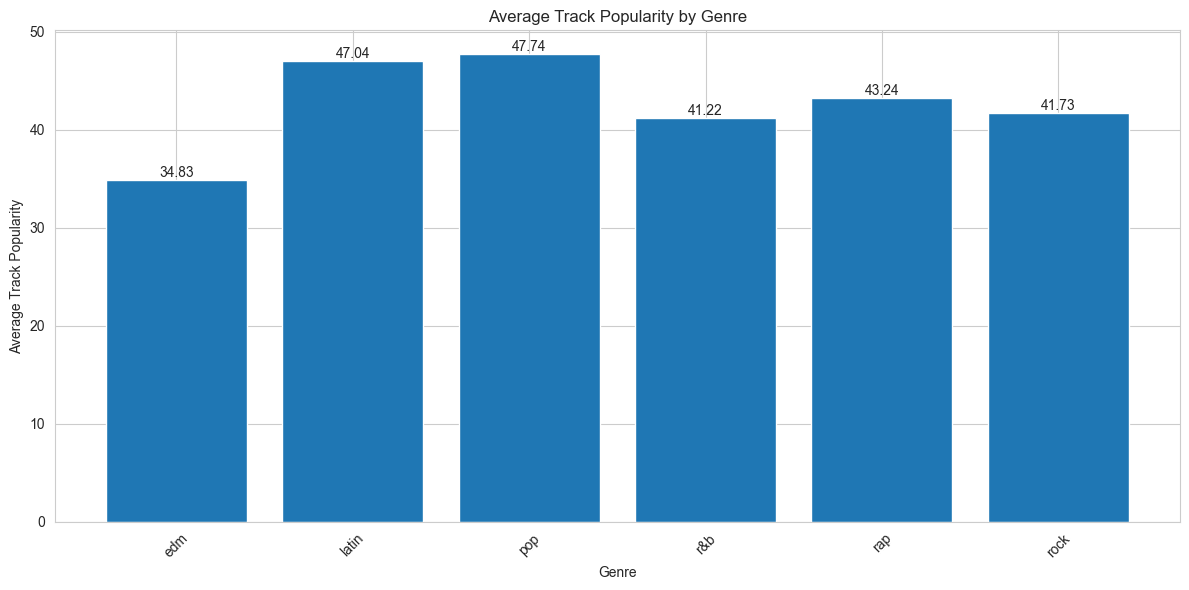

In [11]:

avg_popularity_per_genre = songs.groupby('playlist_genre')['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(avg_popularity_per_genre['playlist_genre'], avg_popularity_per_genre['track_popularity'])

# Add text annotations to each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             round(bar.get_height(), 2), ha='center', va='bottom')

plt.title('Average Track Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Track Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


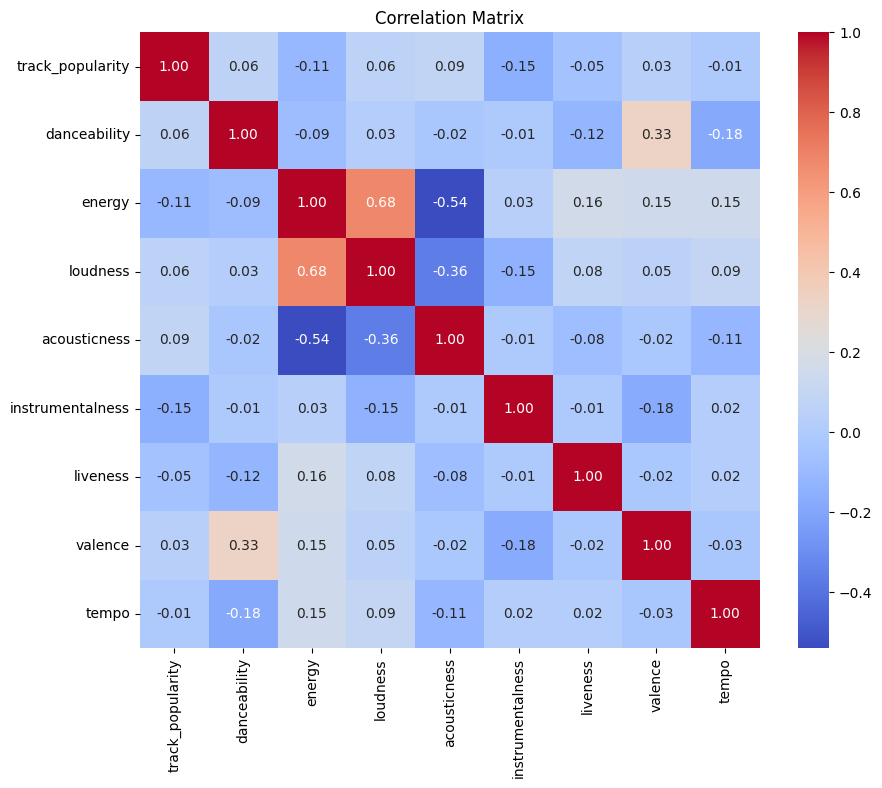

In [16]:
#Create a chart to show the correlations between popularity, danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
columns_for_correlation = ['track_popularity', 'danceability', 'energy', 'loudness',
                           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate the correlation matrix
correlation_matrix = songs[columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

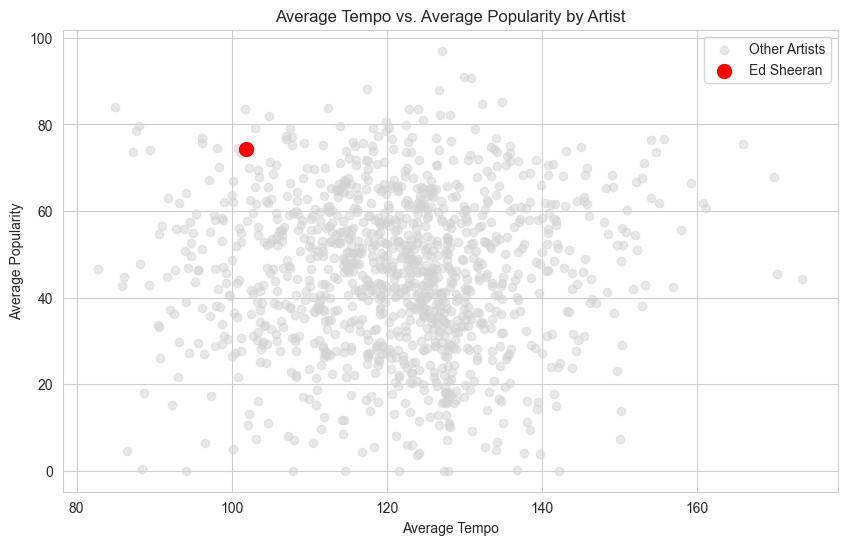

In [12]:


# Filter artists with more than 5 items
popular_artists = songs.groupby('track_artist').filter(lambda x: len(x) > 5)

# Calculate average tempo and popularity for each artist
artist_stats = popular_artists.groupby('track_artist').agg({'tempo': 'mean', 'track_popularity': 'mean', 'playlist_genre': 'first'}).reset_index()

# Define the artist of interest
artist_of_interest = 'Ed Sheeran'

plt.figure(figsize=(10, 6))

plt.scatter(artist_stats['tempo'], artist_stats['track_popularity'], c='lightgray', alpha=0.5, label='Other Artists')

# Plot the artist of interest
plt.scatter(artist_stats[artist_stats['track_artist'] == artist_of_interest]['tempo'],
            artist_stats[artist_stats['track_artist'] == artist_of_interest]['track_popularity'],
            c='red', marker='o', s=100, label=artist_of_interest)

plt.xlabel('Average Tempo')
plt.ylabel('Average Popularity')
plt.title('Average Tempo vs. Average Popularity by Artist')
plt.legend()

plt.grid(True)
plt.show()
